# Regression Final Projesi

## Zingat İstanbul Satılık Konut Verileri

Bu projemizde web scraping ile zingat.com adresinden emlak verilerini çekip, inceleyeceğiz. Feature Engineering işlemlerini yaptıktan sonra bazı göreselleştirmeleri de bitirip Regression Algoritmaları ile modelleme yapacağız.

<img src="zingat.jpg">

# Web Scraping
Web scraping, bir web sitesinden otomatik olarak veri çekme işlemine verilen isimdir. Bu işlem, bir web sayfasının içeriğini analiz ederek, belirli verileri çekme veya kazıma amacıyla yapılır. Web scraping, verileri manuel olarak elde etmek yerine otomatikleştirilmiş bir şekilde toplamak için kullanılır.
​
Python, web scraping için popüler bir programlama dilidir çünkü çeşitli kütüphaneler ve araçlar sunar. Bu kütüphaneler, web sayfalarını yüklemek, içeriği analiz etmek ve istenilen verileri çekmek için kullanılabilir. Özellikle requests, BeautifulSoup, Selenium gibi kütüphaneler web scraping işlemleri için sıkça tercih edilir.
​
Web scraping genellikle aşağıdaki amaçlarla kullanılır:
​
Veri Toplama: Örneğin, fiyat karşılaştırmaları yapmak, ürün stoklarını kontrol etmek veya haber başlıklarını toplamak gibi veri toplama işlemleri için kullanılır.
Analiz ve Tahminler: Büyük veri kümesi üzerinde analiz yapmak ve trendleri belirlemek için web scraping kullanılabilir.
Rakip Analizi: Rakiplerin ürünleri, fiyatları veya stratejileri hakkında bilgi edinmek için kullanılabilir.
Pazar Araştırması: Tüketici görüşlerini, incelemeleri veya anket sonuçlarını toplamak için web scraping yapılabilir.
Ancak, web scraping yaparken hukuki ve etik sorunları dikkate almak önemlidir. Web scraping, bir web sitesinin kullanım koşullarına veya telif hakkı haklarına aykırı olabilir. Bu nedenle, veri toplarken hedef web sitesinin politikalarını okumak ve uygun izinleri almak önemlidir.

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import os
import pandas as pd
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from csv import writer
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings("ignore")

In [4]:
tumiller = ['istanbul']

In [5]:
iller = []
sayfalar = []
for il in tumiller:
    url="https://www.zingat.com/" + il +"-satilik-daire?page="
    iller.append(url)
z = 1
for i in range(0,len(iller)):
    clear_output(wait=True)
    print(z)
    illistesi = requests.get(iller[i]).text
    soup = bs(illistesi, 'html.parser')
    try:
        pag = soup.find("nav", "zng-pagination")['data-total']
        for j in range(2, int(pag)):
            sayfa = iller[i] + str(j)
            sayfalar.append(sayfa)
            z = z + 1
    except:
        continue
sayfalar.extend(iller)

1


In [6]:
sayfaurl = []
satisurl = []
k = 1
m = 1
for sayfa in sayfalar:
    clear_output(wait=True)
    print(m)
    req = requests.get(sayfa)
    soup = bs(req.text, "html.parser")
    sayfaurl.append(soup.select(".zl-card-inner"))
    m = m + 1
for page in sayfaurl:
    for link in page:
        satisurl.append("https://www.zingat.com" + link.get("href"))

47


In [7]:
ozellikler = []
fiyatlar = []
mahalle = []
ilce =[]
il = []
gun = []
ay = []
yil = []
n = 1

for url in satisurl:
    try:
        clear_output(wait=True) 
        print(n)
        req = requests.get(url)
        soup = bs(req.text, "html.parser")
        ozellikler.append([tag.text.strip() for tag in soup.find_all(["strong", "span"], {"class": "col-md-6"})])
        fiyatlar.append(soup.find("strong", itemprop = "price").text.replace("TL", "").replace(".","").replace(" ",""))
        mahalle.append(soup.find("div", "detail-location-path__map").find("h2").text.replace("\n","").replace(" ", "").split(",")[0])
        ilce.append(soup.find("div", "detail-location-path__map").find("h2").text.replace("\n","").replace(" ", "").split(",")[1])
        il.append(soup.find("div", "detail-location-path__map").find("h2").text.replace("\n","").replace(" ", "").split(",")[2])
        gun.append(soup.find("div", "detail-info not-printable").find_all("div")[3].find("strong").text.split(" ")[0])
        ay.append(soup.find("div", "detail-info not-printable").find_all("div")[3].find("strong").text.split(" ")[1])
        yil.append(soup.find("div", "detail-info not-printable").find_all("div")[3].find("strong").text.split(" ")[2])
        n = n + 1
    except:
        continue
    
ozelliklerYeni = []
for ozellik in ozellikler:
    ozelliklerYeni.append(dict(zip(ozellik[::2], ozellik[1::2])))

986


In [8]:
df = pd.DataFrame(ozelliklerYeni)

In [9]:
df.to_csv('ilkveri.csv', index=False)

In [10]:
pd.set_option('display.max_columns',100)

In [7]:
df=pd.read_csv("gerekliveri.csv")

In [8]:
df.head()

,İlan Oda Sayısı,İlan Salon Sayısı,İlan no,Net m²,Brüt m²,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Konut Şekli,Bulunduğu Kat,Görüntülü Ev Gezintisi\n ?,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Yapının Durumu,Krediye Uygun,Aidat,Kira Getirisi,Fiyat,İl,İlçe,Mahalle,İlan Gün,İlan Ay,İlan Yıl
0,2.0,1,4865558.0,100.0,115.0,1.0,5,Kombi (Doğalgaz),Ara Kat,1,Hayır,0,Eşyasız,Boş,Sıfır,Evet,NaN,NaN,1860000.0,İstanbul,Beylikdüzü,Kavaklı,24.0,Ağustos,2023.0
1,4.0,1,4752417.0,165.0,190.0,2.0,10-20 arası,Yerden Isıtma,NaN,16,NaN,31-35 arası,Eşyasız,Boş,NaN,Evet,0 TL (aylık),75.000 TL (aylık),17650000.0,İstanbul,Kadıköy,Feneryolu,24.0,Ağustos,2023.0
2,2.0,1,4865597.0,100.0,110.0,1.0,5,Kombi (Doğalgaz),Ara Kat,3,Hayır,6-10 arası,Eşyasız,Kiracılı,Sıfır,Evet,30 TL (aylık),13.000 TL (aylık),3150000.0,İstanbul,Esenler,NineHatun,24.0,Ağustos,2023.0
3,1.0,1,4863627.0,42.0,59.0,1.0,20 ve üzeri,Merkezi Sistem (Isı Payı Ölçer),Ara Kat,12,Hayır,6-10 arası,Sadece Beyaz Eşya,Kiracılı,NaN,Evet,0 TL (aylık),0 TL (aylık),2950000.0,İstanbul,Ümraniye,Tatlısu,23.0,Ağustos,2023.0
4,2.0,1,4863487.0,95.0,105.0,2.0,10-20 arası,Kombi (Doğalgaz),Ara Kat,2,Evet,6-10 arası,Eşyasız,Boş,Sıfır,Evet,0 TL (aylık),0 TL (aylık),2300000.0,İstanbul,Esenyurt,Cumhuriyet,23.0,Ağustos,2023.0


In [9]:
df['Fiyat'] = pd.Series(fiyatlar)
df['İl'] = pd.Series(il)
df['İlçe'] = pd.Series(ilce)
df['Mahalle'] = pd.Series(mahalle)
df['İlan Gün'] = pd.Series(gun)
df['İlan Ay'] = pd.Series(ay)
df["İlan Yıl"] = pd.Series(yil)

NameError: name 'fiyatlar' is not defined

In [10]:
df.isnull().sum().sort_values(ascending=False)

Yapının Durumu                                                                               436
Aidat                                                                                        252
Konut Şekli                                                                                  243
Kira Getirisi                                                                                217
Isıtma Tipi                                                                                  204
Görüntülü Ev Gezintisi\n                                                                ?    138
Mobilya Durumu                                                                               103
Kullanım Durumu                                                                               51
Bulunduğu Kat                                                                                 44
Binadaki Kat Sayısı                                                                           24
Bina Yaşı                     

In [15]:
df.drop(['Parsel','Hayvan Dostu Patili Evler','Kimden','Ada','Takasa Uygun','Tapu Durumu',"İlan Tarihi"], axis=1, inplace=True)

df = df['Oda Sayısı'].str.rsplit('+', 0, expand=True).join(df)
df=df.rename(columns = {0:'İlan Oda Sayısı'})
df=df.rename(columns = {1:'İlan Salon Sayısı'})
del df['Oda Sayısı']
df[['Brüt m²']] = df[['Brüt m²']].replace('m²', '', regex=True)

In [6]:
df.sample(7)

,İlan Tarihi,İlan no,Net m²,Brüt m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Konut Şekli,Bulunduğu Kat,Takasa Uygun,Görüntülü Ev Gezintisi\n ?,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Yapının Durumu,Tapu Durumu,Krediye Uygun,Aidat,Kira Getirisi,Kimden,Hayvan Dostu Patili Evler,Parsel,Ada
180,25 Ağustos 2023,3720690.0,85.0,90m²,2+1,1.0,5,Kombi (Doğalgaz),NaN,Giriş Katı,Evet,Evet,0,Eşyalı (Mobilyalı),Boş,NaN,NaN,Evet,0 TL (aylık),0 TL (aylık),NaN,NaN,NaN,NaN
895,23 Ağustos 2023,4827907.0,108.0,125m²,3+1,2.0,10-20 arası,Kombi (Doğalgaz),Ara Kat,11,Evet,Evet,11-15 arası,Eşyasız,Boş,Sıfır,Kat Mülkiyeti,Evet,0 TL (aylık),14.000 TL (aylık),Danışman,NaN,NaN,NaN
434,24 Ağustos 2023,4727470.0,90.0,95m²,2+1,1.0,5,Kombi (Doğalgaz),Ara Kat,3,Evet,Hayır,0,Eşyasız,Boş,Sıfır,Arsa Tapulu,Evet,100 TL (aylık),10.000 TL (aylık),Danışman,Evet,NaN,NaN
438,24 Ağustos 2023,4727518.0,88.0,95m²,2+1,2.0,5,Kombi (Doğalgaz),Ara Kat,2,Evet,Hayır,0,Eşyasız,Boş,Sıfır,Arsa Tapulu,Evet,100 TL (aylık),10.000 TL (aylık),Danışman,Evet,NaN,NaN
546,24 Ağustos 2023,4674556.0,85.0,112m²,2+1,2.0,4,Kombi (Doğalgaz),Ara Kat,3,NaN,NaN,0,NaN,Boş,Sıfır,Kat Mülkiyeti,Evet,0 TL (aylık),0 TL (aylık),Danışman,NaN,NaN,NaN
446,24 Ağustos 2023,4800690.0,120.0,130m²,3+1,2.0,4,Yerden Isıtma,NaN,Giriş Katı,Evet,NaN,5,Eşyasız,Boş,Sıfır,Kat Mülkiyeti,Evet,0 TL (aylık),0 TL (aylık),NaN,NaN,NaN,NaN
532,24 Ağustos 2023,4865211.0,75.0,85m²,1+1,1.0,4,Kombi (Doğalgaz),Giriş Kat,Yüksek Giriş,NaN,Evet,0,Eşyasız,Boş,Sıfır,Kat Mülkiyeti,Evet,NaN,NaN,Danışman,Evet,NaN,NaN


In [17]:
df.shape

(987, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 25 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   İlan Oda Sayısı                                                                           977 non-null    float64
 1   İlan Salon Sayısı                                                                         977 non-null    object 
 2   İlan no                                                                                   986 non-null    float64
 3   Net m²                                                                                    986 non-null    float64
 4   Brüt m²                                                                                   986 non-null    float64
 5   Banyo Sayısı                                             

In [22]:
#Veriyi çektikten sonra kaydettik
df.to_csv('istanbulzingat.csv', index=False)

# EDA- Exploratary Data Analysis

In [3]:
df=pd.read_csv("gerekliveri.csv")

In [7]:
df.sample(3)

,İlan Oda Sayısı,İlan Salon Sayısı,İlan no,Net m²,Brüt m²,Banyo Sayısı,Binadaki Kat Sayısı,Isıtma Tipi,Konut Şekli,Bulunduğu Kat,Görüntülü Ev Gezintisi\n ?,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Yapının Durumu,Krediye Uygun,Aidat,Kira Getirisi,Fiyat,İlçe
354,1.0,1,4865913.0,70.0,85.0,1.0,10-20 arası,Merkezi Sistem,Ara Kat,9,Evet,4,Eşyasız,Boş,Sıfır,Evet,0 TL (aylık),9.000 TL (aylık),1190000.0,Esenyurt
489,3.0,2,4766342.0,145.0,155.0,2.0,4,Kombi (Doğalgaz),Ara Dubleks,4,Evet,1,Eşyasız,Boş,Sıfır,Evet,0 TL (aylık),0 TL (aylık),1596000.0,Esenyurt
531,1.0,1,4864990.0,64.0,74.0,1.0,10,Merkezi Sistem (Isı Payı Ölçer),Ara Kat,3,Evet,4,Eşyasız,Boş,İkinci El,Evet,NaN,NaN,1250000.0,Esenyurt


In [12]:
df.drop(["İl", "Mahalle", "İlan Gün", "İlan Ay", "İlan Yıl"], axis=1, inplace=True)

In [13]:
old_cols = df.columns.values 
new_cols = ['İlan no','İlan Oda Sayısı', 'İlan Salon Sayısı',
       'Net m²', 'Brüt m²', 'Banyo Sayısı', 'Binadaki Kat Sayısı', "Aidat", "Kira Getirisi",
       'Isıtma Tipi', 'Bulunduğu Kat', "Konut Şekli", 'Krediye Uygun',"Bina Yaşı",'İlçe','Fiyat',"Yapının Durumu","Kullanım Durumu","Mobilya Durumu"]
df = df.reindex(columns=new_cols)

In [14]:
df.head()

,İlan no,İlan Oda Sayısı,İlan Salon Sayısı,Net m²,Brüt m²,Banyo Sayısı,Binadaki Kat Sayısı,Aidat,Kira Getirisi,Isıtma Tipi,Bulunduğu Kat,Konut Şekli,Krediye Uygun,Bina Yaşı,İlçe,Fiyat,Yapının Durumu,Kullanım Durumu,Mobilya Durumu
0,4865558.0,2.0,1,100.0,115.0,1.0,5,NaN,NaN,Kombi (Doğalgaz),1,Ara Kat,Evet,0,Beylikdüzü,1860000.0,Sıfır,Boş,Eşyasız
1,4752417.0,4.0,1,165.0,190.0,2.0,10-20 arası,0 TL (aylık),75.000 TL (aylık),Yerden Isıtma,16,NaN,Evet,31-35 arası,Kadıköy,17650000.0,NaN,Boş,Eşyasız
2,4865597.0,2.0,1,100.0,110.0,1.0,5,30 TL (aylık),13.000 TL (aylık),Kombi (Doğalgaz),3,Ara Kat,Evet,6-10 arası,Esenler,3150000.0,Sıfır,Kiracılı,Eşyasız
3,4863627.0,1.0,1,42.0,59.0,1.0,20 ve üzeri,0 TL (aylık),0 TL (aylık),Merkezi Sistem (Isı Payı Ölçer),12,Ara Kat,Evet,6-10 arası,Ümraniye,2950000.0,NaN,Kiracılı,Sadece Beyaz Eşya
4,4863487.0,2.0,1,95.0,105.0,2.0,10-20 arası,0 TL (aylık),0 TL (aylık),Kombi (Doğalgaz),2,Ara Kat,Evet,6-10 arası,Esenyurt,2300000.0,Sıfır,Boş,Eşyasız


In [16]:
df.shape

(987, 19)

In [17]:
df.describe() #sayısal veriler üzerinden istatiksel değerler

,İlan no,İlan Oda Sayısı,Net m²,Brüt m²,Banyo Sayısı,Fiyat
count,9.860000e+02,977.000000,986.000000,986.000000,977.000000,9.860000e+02
mean,4.739058e+06,2.498465,111.730223,131.688641,1.480041,8.398312e+06
std,1.907528e+05,0.980469,48.923355,59.856626,0.643267,7.933330e+07
min,2.416029e+06,1.000000,30.000000,40.000000,0.000000,1.390000e+04
25%,4.693928e+06,2.000000,80.000000,95.000000,1.000000,2.000000e+06
50%,4.800695e+06,2.000000,100.000000,120.000000,1.000000,3.200000e+06
75%,4.863492e+06,3.000000,130.000000,150.000000,2.000000,6.287500e+06
max,4.866677e+06,8.000000,380.000000,510.000000,5.000000,2.480000e+09


In [18]:
df.corr()

,İlan no,İlan Oda Sayısı,Net m²,Brüt m²,Banyo Sayısı,Fiyat
İlan no,1.000000,-0.135142,-0.149828,-0.163304,-0.132207,0.008234
İlan Oda Sayısı,-0.135142,1.000000,0.807494,0.787829,0.635545,0.043383
Net m²,-0.149828,0.807494,1.000000,0.966649,0.709626,0.041648
Brüt m²,-0.163304,0.787829,0.966649,1.000000,0.731635,0.039156
Banyo Sayısı,-0.132207,0.635545,0.709626,0.731635,1.000000,0.016128
Fiyat,0.008234,0.043383,0.041648,0.039156,0.016128,1.000000


In [19]:
df.İlçe.value_counts()

Esenyurt         163
Beylikdüzü       109
Sarıyer           57
Sancaktepe        51
Kadıköy           49
Çekmeköy          38
Avcılar           35
Eyüpsultan        33
Esenler           31
Maltepe           28
Başakşehir        24
Şişli             24
Gaziosmanpaşa     22
Pendik            21
Zeytinburnu       21
Kartal            21
Beşiktaş          21
Üsküdar           20
Sultanbeyli       19
Ataşehir          18
Büyükçekmece      18
Küçükçekmece      17
Sultangazi        16
Kağıthane         16
Bahçelievler      15
Fatih             15
Bağcılar          14
Ümraniye          14
Bakırköy          10
Güngören           9
Arnavutköy         9
Beyoğlu            8
Silivri            7
Bayrampaşa         7
Tuzla              4
Şile               1
Beykoz             1
Name: İlçe, dtype: int64

In [26]:
df.to_csv('sonhaliveri.csv', index=False)

In [2]:
df=pd.read_csv("sonhaliveri.csv")

# Veri Görselleştirmesi

Text(0, 0.5, 'İlçe')

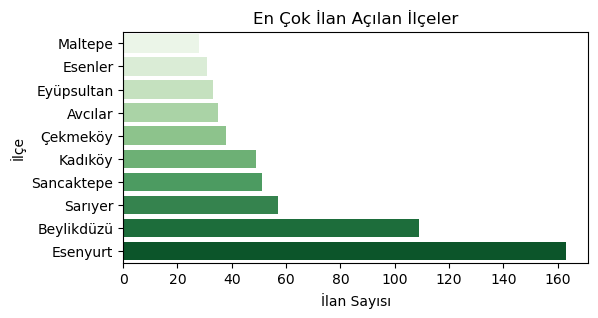

In [20]:
districts = df["İlçe"].value_counts()[0:10].sort_values()
plt.figure(figsize=(6,3))
plot = sns.barplot(x = districts.values, y = districts.index, palette="Greens")
plt.title("En Çok İlan Açılan İlçeler")
plt.xlabel("İlan Sayısı")
plt.ylabel("İlçe")

Text(0.5, 1.0, 'Apartmanların Yaş Durumu')

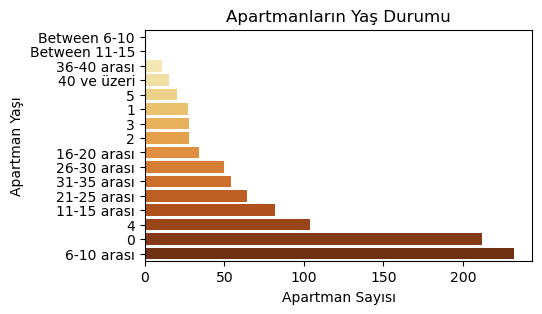

In [21]:
apt_age = df["Bina Yaşı"].value_counts().sort_values(ascending=True)
plt.figure(figsize = (5,3))
sns.barplot(x = apt_age.values, y = apt_age.index, palette="YlOrBr", orient="h")
plt.xlabel("Apartman Sayısı")
plt.ylabel("Apartman Yaşı")
plt.title("Apartmanların Yaş Durumu")

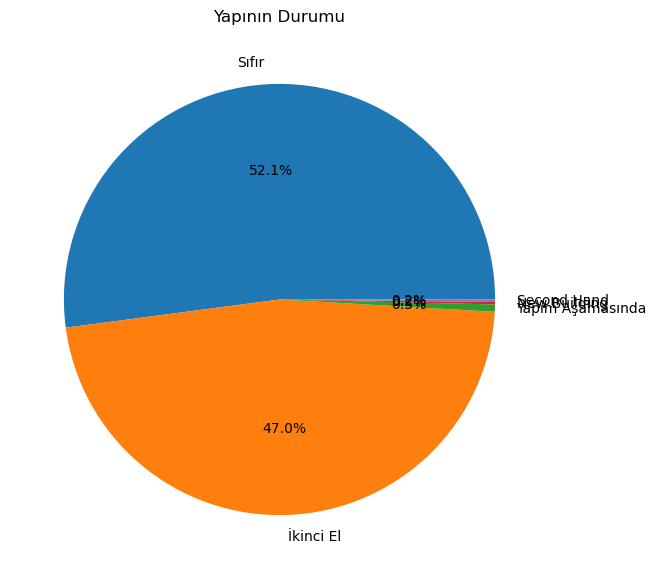

In [22]:
fig = plt.figure(figsize=(15,7))
df["Yapının Durumu"].value_counts().plot(kind = 'pie',autopct='%.1f%%')
plt.ylabel("", fontsize = 10)
plt.title("Yapının Durumu");

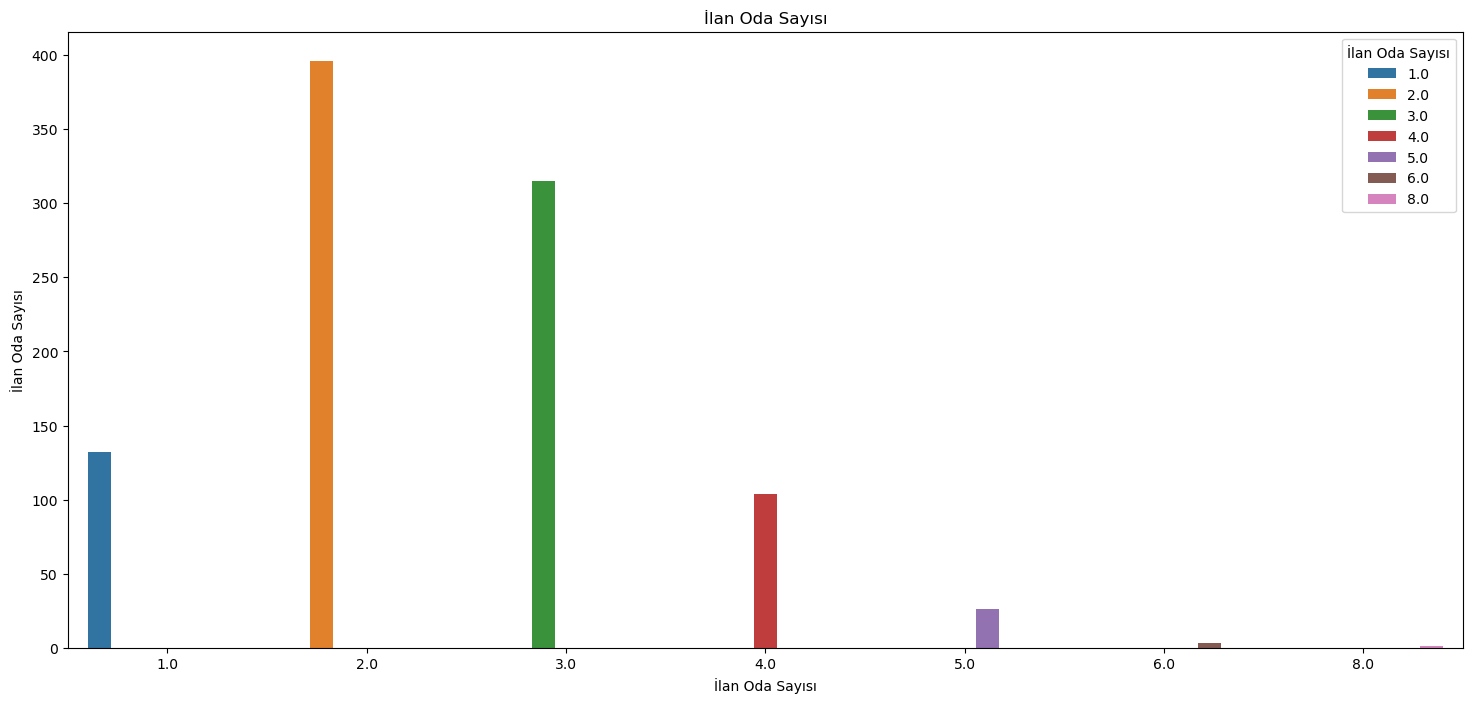

In [23]:
plt.figure(figsize=(18,8))
sns.countplot(x='İlan Oda Sayısı',data=df,hue="İlan Oda Sayısı")
plt.title("İlan Oda Sayısı")
plt.xlabel("İlan Oda Sayısı")
plt.ylabel("İlan Oda Sayısı")
plt.show()

# Veri Temizleme ve Düzenleme

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan no              986 non-null    float64
 1   İlan Oda Sayısı      977 non-null    float64
 2   İlan Salon Sayısı    977 non-null    object 
 3   Net m²               986 non-null    float64
 4   Brüt m²              986 non-null    float64
 5   Banyo Sayısı         977 non-null    float64
 6   Binadaki Kat Sayısı  963 non-null    object 
 7   Aidat                735 non-null    object 
 8   Kira Getirisi        770 non-null    object 
 9   Isıtma Tipi          987 non-null    object 
 10  Bulunduğu Kat        987 non-null    object 
 11  Konut Şekli          744 non-null    object 
 12  Krediye Uygun        986 non-null    object 
 13  Bina Yaşı            963 non-null    object 
 14  İlçe                 986 non-null    object 
 15  Fiyat                986 non-null    flo

In [49]:
df["Banyo Sayısı"].value_counts()

1.0    574
2.0    338
3.0     57
4.0      5
0.0      2
5.0      1
Name: Banyo Sayısı, dtype: int64

In [43]:
df["Kullanım Durumu"].value_counts()

0    533
1    403
Name: Kullanım Durumu, dtype: int64

In [31]:
df.loc[df["Konut Şekli"] == "Ara Kat", "Konut Şekli"] = "1"
df.loc[df["Konut Şekli"] == "Çatı Dubleksi", "Konut Şekli"] = "1"
df.loc[df["Konut Şekli"] == "En Üst Kat", "Konut Şekli"] = "1"
df.loc[df["Konut Şekli"] == "Giriş Kat", "Konut Şekli"] = "0"
df.loc[df["Konut Şekli"] == "Bahçe Katı", "Konut Şekli"] = "0"
df.loc[df["Konut Şekli"] == "Dubleks", "Konut Şekli"] = "2"
df.loc[df["Konut Şekli"] == "Ters Dubleks", "Konut Şekli"] = "2"
df.loc[df["Konut Şekli"] == "Ara Dubleks", "Konut Şekli"] = "2"
df.loc[df["Konut Şekli"] == "Bahçe Dubleksi", "Konut Şekli"] = "2"
df.loc[df["Konut Şekli"] == "Tripleks", "Konut Şekli"] = "3"
df.loc[df["Konut Şekli"] == "Triplex", "Konut Şekli"] = "3"
df.loc[df["Konut Şekli"] == "Intermediate Floor", "Konut Şekli"] = "1"
df.loc[df["Konut Şekli"] == "Teras Katı", "Konut Şekli"] = "1"

In [7]:
df["Aidat"] = df["Aidat"].str.replace(" TL  (aylık)", "") # "TL  (aylık)" ifadesini çıkar
df["Aidat"] = df["Aidat"].str.replace(r" TL  \(aylık\)", "").str.replace(".", "").str.replace(",", "").str.strip()
df["Aidat"] = df["Aidat"].str.replace(".", "").str.replace(",", "").str.strip() # Virgül ve noktaları kaldır
df["Aidat"] = df["Aidat"].str.replace(r"\.", "").str.replace(",", "").str.strip()

In [10]:
df["Kira Getirisi"] = df["Kira Getirisi"].str.replace(" TL  (aylık)", "") # "TL  (aylık)" ifadesini çıkar
df["Kira Getirisi"] = df["Kira Getirisi"].str.replace(r" TL  \(aylık\)", "").str.replace(".", "").str.replace(",", "").str.strip()
df["Kira Getirisi"] = df["Kira Getirisi"].str.replace(".", "").str.replace(",", "").str.strip() # Virgül ve noktaları kaldır
df["Kira Getirisi"] = df["Kira Getirisi"].str.replace(r"\.", "").str.replace(",", "").str.strip()

In [68]:
df['İlan Salon Sayısı'] = df['İlan Salon Sayısı'].replace("0 (Stüdyo)", 0)

In [47]:
df['Fiyat'].replace({'\n':'',',':'',' TL':''},regex=True,inplace=True)

In [45]:
df.loc[df["Mobilya Durumu"] == "Eşyasız", "Mobilya Durumu"] = "0"
df.loc[df["Mobilya Durumu"] == "Sadece Beyaz Eşya", "Mobilya Durumu"] = "1"
df.loc[df["Mobilya Durumu"] == "Eşyalı (Mobilyalı)", "Mobilya Durumu"] = "1"
df.loc[df["Mobilya Durumu"] == "Sadece Mutfak", "Mobilya Durumu"] = "1"
df.loc[df["Mobilya Durumu"] == "Unfurnished", "Mobilya Durumu"] = "0"

In [42]:
df.loc[df["Kullanım Durumu"] == "Boş", "Kullanım Durumu"] = "0"
df.loc[df["Kullanım Durumu"] == "Kiracılı", "Kullanım Durumu"] = "1"
df.loc[df["Kullanım Durumu"] == "Mülk Sahibi", "Kullanım Durumu"] = "1"
df.loc[df["Kullanım Durumu"] == "Occupied By Tenant", "Kullanım Durumu"] = "1"
df.loc[df["Kullanım Durumu"] == "Vacant", "Kullanım Durumu"] = "0"

In [40]:
df.loc[df["Yapının Durumu"] == "İkinci El", "Yapının Durumu"] = "1"
df.loc[df["Yapının Durumu"] == "Sıfır", "Yapının Durumu"] = "0"
df.loc[df["Yapının Durumu"] == "Yapım Aşamasında", "Yapının Durumu"] = "0"
df.loc[df["Yapının Durumu"] == "Second Hand", "Yapının Durumu"] = "1"
df.loc[df["Yapının Durumu"] == "New Building", "Yapının Durumu"] = "0"

In [36]:
df.loc[df["Bina Yaşı"] == "6-10 arası", "Bina Yaşı"] = "8"
df.loc[df["Bina Yaşı"] == "11-15 arası", "Bina Yaşı"] = "13"
df.loc[df["Bina Yaşı"] == "21-25 arası", "Bina Yaşı"] = "23"
df.loc[df["Bina Yaşı"] == "31-35 arası", "Bina Yaşı"] = "33"
df.loc[df["Bina Yaşı"] == "26-30 arası", "Bina Yaşı"] = "28"
df.loc[df["Bina Yaşı"] == "16-20 arası", "Bina Yaşı"] = "18"
df.loc[df["Bina Yaşı"] == "40 ve üzeri", "Bina Yaşı"] = "40"
df.loc[df["Bina Yaşı"] == "36-40 arası", "Bina Yaşı"] = "36"
df.loc[df["Bina Yaşı"] == "Between 6-10", "Bina Yaşı"] = "8"
df.loc[df["Bina Yaşı"] == "Between 11-15", "Bina Yaşı"] = "13"

df["Bulunduğu Kat"] = df["Bulunduğu Kat"].astype(str)

In [26]:
df.loc[df["Krediye Uygun"] == "Evet" , "Krediye Uygun"] = "1"
df.loc[df["Krediye Uygun"] == "Yes" , "Krediye Uygun"] = "1"
df.loc[df["Krediye Uygun"] == "Hayır" , "Krediye Uygun"] = "0"
df.loc[df["Krediye Uygun"] == "No" , "Krediye Uygun"] = "0"

In [21]:
df.loc[df["Bulunduğu Kat"] == "Bahçe katı", "Bulunduğu Kat"] = "0"
df.loc[df["Bulunduğu Kat"] == "Giriş Katı", "Bulunduğu Kat"] = "0"
df.loc[df["Bulunduğu Kat"] == "Yüksek Giriş", "Bulunduğu Kat"] = "0"

df.loc[df["Bulunduğu Kat"] == "En Üst Kat", "Bulunduğu Kat"] = "7"
df.loc[df["Bulunduğu Kat"] == "20-29", "Bulunduğu Kat"] = "20"
df.loc[df["Bulunduğu Kat"] == "Çatı Katı", "Bulunduğu Kat"] = "7"
df.loc[df["Bulunduğu Kat"] == "Kot 1", "Bulunduğu Kat"] = "-1"
df.loc[df["Bulunduğu Kat"] == "Kot 2", "Bulunduğu Kat"] = "-2"
df.loc[df["Bulunduğu Kat"] == "Kot 3", "Bulunduğu Kat"] = "-3"
df.loc[df["Bulunduğu Kat"] == "Kot 4", "Bulunduğu Kat"] = "-4"
df.loc[df["Bulunduğu Kat"] == "Zemin Kat", "Bulunduğu Kat"] = "0"
df.loc[df["Bulunduğu Kat"] == "Müstakil", "Bulunduğu Kat"] = "1"
df.loc[df["Bulunduğu Kat"] == "Teras Kat", "Bulunduğu Kat"] = "7"
df.loc[df["Bulunduğu Kat"] == "Bodrum Kat", "Bulunduğu Kat"] = "-1"
df.loc[df["Bulunduğu Kat"] == "nan", "Bulunduğu Kat"] = "0"

df.loc[df["Bulunduğu Kat"] == "nan", "Bulunduğu Kat"] = "0"
df.loc[df["Bulunduğu Kat"] == "20 ve üzeri", "Bulunduğu Kat"] = "20"

df["Bulunduğu Kat"] = df["Bulunduğu Kat"].astype(str)

In [17]:
df["Isıtma Tipi"] = df["Isıtma Tipi"].fillna('0')
df.loc[df["Isıtma Tipi"] == "Güneş Enerjisi" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Fancoil" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Soba (Doğalgaz)" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Kombi (Elektrikli)" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Combi Boiler (Natural Gas)" , "Isıtma Tipi"] = "1"

df.loc[df["Isıtma Tipi"] == "Kalorifer (Doğalgaz)" , "Isıtma Tipi"] = "2"
df.loc[df["Isıtma Tipi"] == "Yerden Isıtma" , "Isıtma Tipi"] = "2"
df.loc[df["Isıtma Tipi"] == "Merkezi Sistem" , "Isıtma Tipi"] = "3"
df.loc[df["Isıtma Tipi"] == "Merkezi Sistem (Isı Payı Ölçer)" , "Isıtma Tipi"] = "3"
df.loc[df["Isıtma Tipi"] == "Klima" , "Isıtma Tipi"] = "2"
df.loc[df["Isıtma Tipi"] == "Kombi (Doğalgaz)" , "Isıtma Tipi"] = "3"

df.loc[df["Isıtma Tipi"] == "Kat Kaloriferi" , "Isıtma Tipi"] = "2"
df.loc[df["Isıtma Tipi"] == "Soba (Kömür)" , "Isıtma Tipi"] = "1"
df.loc[df["Isıtma Tipi"] == "Central System (Heat Share Meter)" , "Isıtma Tipi"] = "3"

In [48]:
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("6 ve üzeri", 6)

In [76]:
df.loc[df["Binadaki Kat Sayısı"] == "10-20 arası", "Binadaki Kat Sayısı"] = "15"
df.loc[df["Binadaki Kat Sayısı"] == "20 ve üzeri", "Binadaki Kat Sayısı"] = "20"
df.loc[df["Binadaki Kat Sayısı"] == "20+", "Binadaki Kat Sayısı"] = "25"

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan no              987 non-null    int64  
 1   İlan Oda Sayısı      987 non-null    float64
 2   İlan Salon Sayısı    987 non-null    int32  
 3   Net m²               987 non-null    int64  
 4   Brüt m²              987 non-null    int64  
 5   Banyo Sayısı         987 non-null    int32  
 6   Binadaki Kat Sayısı  987 non-null    int32  
 7   Isıtma Tipi          987 non-null    int32  
 8   Bulunduğu Kat        987 non-null    int32  
 9   Krediye Uygun        987 non-null    int32  
 10  Bina Yaşı            987 non-null    object 
 11  İlçe                 987 non-null    object 
 12  Fiyat                987 non-null    int64  
 13  Yapının Durumu       987 non-null    object 
 14  Kullanım Durumu      987 non-null    object 
 15  Mobilya Durumu       987 non-null    obj

In [82]:
df.to_csv('temizveri2.csv', index=False)

In [41]:
df=pd.read_csv("temizveri3.csv")

# Veri Boşluklarını Doldurma

In [42]:
df.isnull().sum().sort_values(ascending=False)

Aidat                  252
İlan no                  1
Brüt m²                  1
Krediye Uygun            1
Fiyat                    1
Net m²                   1
İlçe_Üsküdar             0
İlçe_Pendik              0
İlçe_Eyüpsultan          0
İlçe_Fatih               0
İlçe_Gaziosmanpaşa       0
İlçe_Güngören            0
İlçe_Kadıköy             0
İlçe_Kartal              0
İlçe_Kağıthane           0
İlçe_Küçükçekmece        0
İlçe_Maltepe             0
İlçe_Sancaktepe          0
İlçe_Ümraniye            0
İlçe_Sarıyer             0
İlçe_Silivri             0
İlçe_Esenler             0
İlçe_Sultanbeyli         0
İlçe_Şile                0
İlçe_Sultangazi          0
İlçe_Tuzla               0
İlçe_Zeytinburnu         0
İlçe_Çekmeköy            0
İlçe_Esenyurt            0
İlçe_Beyoğlu             0
İlçe_Büyükçekmece        0
İlçe_Beşiktaş            0
İlan Salon Sayısı        0
Banyo Sayısı             0
Binadaki Kat Sayısı      0
Kira Getirisi            0
Isıtma Tipi              0
B

In [34]:
df['İlan no'].fillna(df['İlan no'].mean(), inplace=True)
df['Brüt m²'].fillna(df['Brüt m²'].mean(), inplace=True)
df['Krediye Uygun'].fillna(df['Krediye Uygun'].mode().iloc[0], inplace=True)
df['Net m²'].fillna(df['Net m²'].mean(), inplace=True)
df['Fiyat'].fillna(df['Fiyat'].mean(), inplace=True)

In [54]:
df['Bina Yaşı'].fillna(0, inplace=True)
df['Yapının Durumu'].fillna(df['Yapının Durumu'].mode().iloc[0], inplace=True)
df['Kullanım Durumu'].fillna(df['Kullanım Durumu'].mode().iloc[0], inplace=True)
df['Mobilya Durumu'].fillna(0, inplace=True)
df['İlan Oda Sayısı'].fillna(df['İlan Oda Sayısı'].mean(), inplace=True)
df['İlan Salon Sayısı'].fillna(df['İlan Salon Sayısı'].mode().iloc[0], inplace=True)
df['Banyo Sayısı'].fillna(df['Banyo Sayısı'].mode().iloc[0], inplace=True)
df['Binadaki Kat Sayısı'].fillna(df['Binadaki Kat Sayısı'].mode().iloc[0], inplace=True)
df['Konut Şekli'].fillna(df['Konut Şekli'].mode().iloc[0], inplace=True)
df['Kira Getirisi'].fillna(0, inplace=True)                        

In [48]:
# Aidat önemli olduğu için regression ile dolduralım
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
hgb=HistGradientBoostingRegressor
from sklearn.metrics import r2_score

In [49]:
full=df[df['Aidat'].notnull()]
y=full['Aidat'].astype(int)
x=full.drop(columns=['Aidat'],axis=1)

In [50]:
x

,İlan no,İlan Oda Sayısı,İlan Salon Sayısı,Net m²,Brüt m²,Banyo Sayısı,Binadaki Kat Sayısı,Kira Getirisi,Isıtma Tipi,Bulunduğu Kat,Konut Şekli,Krediye Uygun,Bina Yaşı,Fiyat,Yapının Durumu,Kullanım Durumu,Mobilya Durumu,İlçe_Ataşehir,İlçe_Avcılar,İlçe_Bahçelievler,İlçe_Bakırköy,İlçe_Bayrampaşa,İlçe_Bağcılar,İlçe_Başakşehir,İlçe_Beykoz,İlçe_Beylikdüzü,İlçe_Beyoğlu,İlçe_Beşiktaş,İlçe_Büyükçekmece,İlçe_Esenler,İlçe_Esenyurt,İlçe_Eyüpsultan,İlçe_Fatih,İlçe_Gaziosmanpaşa,İlçe_Güngören,İlçe_Kadıköy,İlçe_Kartal,İlçe_Kağıthane,İlçe_Küçükçekmece,İlçe_Maltepe,İlçe_Pendik,İlçe_Sancaktepe,İlçe_Sarıyer,İlçe_Silivri,İlçe_Sultanbeyli,İlçe_Sultangazi,İlçe_Tuzla,İlçe_Zeytinburnu,İlçe_Çekmeköy,İlçe_Ümraniye,İlçe_Üsküdar,İlçe_Şile,İlçe_Şişli
1,4752417.0,4.0,1,165.0,190.0,2.0,15,75000,2,16,1,1.0,33,17650000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4865597.0,2.0,1,100.0,110.0,1.0,5,13000,3,3,1,1.0,8,3150000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4863627.0,1.0,1,42.0,59.0,1.0,20,0,3,12,1,1.0,8,2950000.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4863487.0,2.0,1,95.0,105.0,2.0,15,0,3,2,1,1.0,8,2300000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,4517000.0,3.0,1,129.0,130.0,1.0,3,0,3,0,1,1.0,13,2500000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,4735163.0,1.0,1,80.0,90.0,1.0,15,0,3,8,1,1.0,4,998000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
982,4735205.0,2.0,1,100.0,110.0,1.0,6,0,2,1,1,1.0,0,8350000.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
983,4829429.0,2.0,1,85.0,110.0,1.0,15,0,0,3,1,1.0,13,8300000.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
984,4866424.0,3.0,1,165.0,180.0,2.0,5,35000,3,2,1,1.0,8,3850000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [51]:
miss=df[df['Aidat'].isnull()]
miss=miss.drop(columns='Aidat',axis=1)

In [52]:
pred2=hgb.fit(x,y).predict(miss)

TypeError: BaseHistGradientBoosting.fit() missing 1 required positional argument: 'y'

In [ ]:
miss.loc[:,'Aidat']=pred2

In [ ]:
df[df['Aidat'].isnull()]=miss

In [ ]:
# Regression modeli Aidatta çalışmadığı için ortalama ile dolduruyoruz

In [24]:
df['Aidat'].fillna(df['Aidat'].mean(), inplace=True)

In [ ]:
# Modelin sıhhatli çalışması için Objectleri çeviriyoruz

In [90]:
abs(df.corr()['Fiyat'].sort_values(ascending=False))

Fiyat              1.000000
Brüt m²            0.064503
Net m²             0.058305
İlan Oda Sayısı    0.027899
İlan no            0.015741
Name: Fiyat, dtype: float64

In [96]:
df["İlan Oda Sayısı"]=df["İlan Oda Sayısı"]**2

In [118]:
for col in ('İlan Salon Sayısı','Banyo Sayısı','Binadaki Kat Sayısı','Isıtma Tipi','Bulunduğu Kat','Krediye Uygun','Bina Yaşı','Yapının Durumu','Yapının Durumu','Mobilya Durumu') : df[col]=df[col].astype(int) 

In [40]:
df.to_csv('sonhal.csv', index=False)

# Modelleme

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [37]:
def algo_test(x,y):

        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        XGBC=XGBRegressor()
        dt=DecisionTreeRegressor()
        kn=KNeighborsRegressor()
        
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=13)
        
        algos=[L,R,Lass,E,ETR,GBR,XGBC,dt,kn]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','XGradientBoosting','DecisionTree','KNeighbors']
        
        r2Score = []
        rmse = []
        mae = []
        
        result=pd.DataFrame(columns=['R2_score','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r2Score.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result['R2_score']=r2Score 
        result.RMSE=rmse
        result.MAE=mae


        return result.sort_values('R2_score',ascending=False)

In [83]:
#İlçe için get dummies
dfd=pd.get_dummies(df,drop_first=True)

In [84]:
df_dummies = pd.get_dummies(df.drop(columns=['İlçe']), drop_first=True)
cols = df_dummies.columns.to_list()

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_dummies=scaler.fit_transform(df_dummies)
df_dummies=pd.DataFrame(df_dummies, columns=cols)

In [28]:
from sklearn.model_selection import train_test_split

x=df_dummies.drop(columns=['Fiyat'])
y=df_dummies['Fiyat']

NameError: name 'df_dummies' is not defined

In [29]:
algo_test(x,y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [141]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   İlan no              987 non-null    float64
 1   İlan Oda Sayısı      987 non-null    float64
 2   İlan Salon Sayısı    987 non-null    float64
 3   Net m²               987 non-null    float64
 4   Brüt m²              987 non-null    float64
 5   Banyo Sayısı         987 non-null    float64
 6   Binadaki Kat Sayısı  987 non-null    float64
 7   Isıtma Tipi          987 non-null    float64
 8   Bulunduğu Kat        987 non-null    float64
 9   Krediye Uygun        987 non-null    float64
 10  Bina Yaşı            987 non-null    float64
 11  Fiyat                987 non-null    float64
 12  Yapının Durumu       987 non-null    float64
 13  Mobilya Durumu       987 non-null    float64
 14  Kullanım Durumu_0    987 non-null    float64
 15  Kullanım Durumu_1    987 non-null    flo

In [145]:
df_dummies.shape

(987, 16)

In [38]:
from sklearn.model_selection import train_test_split
y=df[["Fiyat"]]
x=df.drop(columns='Fiyat',axis=1)

In [39]:
algo_test(x,y)

AttributeError: 'NoneType' object has no attribute 'split'

In [136]:
#Colabta çalışıyor
#pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [159]:
df_dummies.to_csv('df_dummies.csv', index=False)

# Pycaret

In [144]:
# Pycaret
train=df_dummies[:494]
test=df_dummies[494:]

In [146]:
y=train["Fiyat"]
x=train.drop("Fiyat", axis=1)

In [147]:
from pycaret.regression import*

AttributeError: 'NoneType' object has no attribute 'split'

In [148]:
setup(train,target='Fiyat')

NameError: name 'setup' is not defined

In [149]:
compare_models()

NameError: name 'compare_models' is not defined

# Deep Learning

In [153]:
#Derin Öğrenme
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=7)

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [154]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, Embedding, Bidirectional, BatchNormalization
model=Sequential()
model.add(Dense(81, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [155]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=30 )

Epoch 1/30
13/13 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 8.6474e-05
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 9.9533e-05 - val_loss: 2.5915e-05
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 5.8111e-05 - val_loss: 1.3232e-05
Epoch 4/30
13/13 [==============================] - 0s 5ms/step - loss: 3.0626e-05 - val_loss: 9.2741e-06
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 3.2220e-05 - val_loss: 8.7114e-06
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 1.8788e-05 - val_loss: 8.6957e-06
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 1.7370e-05 - val_loss: 8.6931e-06
Epoch 8/30
13/13 [==============================] - 0s 4ms/step - loss: 1.6750e-05 - val_loss: 8.7206e-06
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 1.9461e-05 - val_loss: 8.6930e-06
Epoch 10/30
13/13 [==============================

In [156]:
pred=model.predict(x_test)

4/4 [==============================] - 0s 6ms/step


In [157]:
(mean_squared_error(y_test, pred))**.5

0.0029530257260390563

In [158]:
r2_score(y_test, pred)

-0.003147015150028132